# VGG 16

### Settings

In [13]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples

RANDOM_SEED = 1
BATCH_SIZE = 256
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Data Loading

In [14]:
# Set random seed
set_all_seeds(RANDOM_SEED)
set_deterministic()

transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((64,64)),
        torchvision.transforms.ToTensor(), 
        torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

# Load images 
dataset_dir = './data'
dataset = torchvision.datasets.ImageFolder(root = dataset_dir, transform = transform)

# Determine sizes of the training set and the test set
total_size = len(dataset)
train_size = int(np.floor(total_size * 0.6))
test_size = int(np.floor(total_size * 0.3))
valid_size = total_size - test_size - train_size

In [15]:
# Split the entire dataset into 60% of training set, 30% of test set, and 10% validation set.
training_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, test_size, valid_size])

In [16]:
# Loaders
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size = BATCH_SIZE, shuffle = False)

### Model

In [17]:
class VGG16(torch.nn.Module):
    def __init__(self, num_classes, grayscale = False):
        super().__init__()
        self.grayscale = grayscale
        self.num_classes = num_classes
        
        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3
        
        self.block_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, 64, kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(64,64,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace = True),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.block_2 = torch.nn.Sequential(
            torch.nn.Conv2d(64,128,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(128,128,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace = True),
            torch.nn.MaxPool2d(kernel_size =2, stride = 2),
        )
        self.block_3 = torch.nn.Sequential(
            torch.nn.Conv2d(128,256,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(256,256,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(256,256,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace = True),
            torch.nn.MaxPool2d(kernel_size =2, stride = 2),
        )
        self.block_4 = torch.nn.Sequential(
            torch.nn.Conv2d(256,512,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(512,512,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(512,512,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace = True),
            torch.nn.MaxPool2d(kernel_size =2, stride = 2),
        )
        self.block_5 = torch.nn.Sequential(
            torch.nn.Conv2d(512,512,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(512,512,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace = True),
            
            torch.nn.Conv2d(512,512,kernel_size = 3, padding = 1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace = True),
            torch.nn.MaxPool2d(kernel_size =2, stride = 2),
        )
        height,width = 3,3
        
        self.avgpool = torch.nn.AdaptiveAvgPool2d((height,width))
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(512*width*height, 4096),
            torch.nn.BatchNorm1d(4096),
            torch.nn.ReLU(inplace = True),     
            torch.nn.Dropout(0.5),
            
            torch.nn.Linear(4096,4096),     
            torch.nn.BatchNorm1d(4096),
            torch.nn.ReLU(inplace = True),
            torch.nn.Dropout(0.5),
            
            torch.nn.Linear(4096,num_classes)
        )
        
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        logits = self.classifier(x)
        return logits

Epoch: 001/050 | Batch 0000/0018 | Loss: 0.8378
Epoch: 001/050 | Batch 0003/0018 | Loss: 7.0079
Epoch: 001/050 | Batch 0006/0018 | Loss: 3.6626
Epoch: 001/050 | Batch 0009/0018 | Loss: 6.2264
Epoch: 001/050 | Batch 0012/0018 | Loss: 3.7513


d:\users\asus\appdata\local\programs\python\python39\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 001/050 | Batch 0015/0018 | Loss: 3.9931
Epoch: 001/050 | Train: 52.37% | Validation: 54.43%
Time elapsed: 7.66 min
Epoch: 002/050 | Batch 0000/0018 | Loss: 1.1257
Epoch: 002/050 | Batch 0003/0018 | Loss: 0.8196
Epoch: 002/050 | Batch 0006/0018 | Loss: 0.7148
Epoch: 002/050 | Batch 0009/0018 | Loss: 2.4480
Epoch: 002/050 | Batch 0012/0018 | Loss: 0.7359
Epoch: 002/050 | Batch 0015/0018 | Loss: 1.3774
Epoch: 002/050 | Train: 33.72% | Validation: 33.69%
Time elapsed: 17.09 min
Epoch: 003/050 | Batch 0000/0018 | Loss: 1.0559
Epoch: 003/050 | Batch 0003/0018 | Loss: 1.6145
Epoch: 003/050 | Batch 0006/0018 | Loss: 0.8063
Epoch: 003/050 | Batch 0009/0018 | Loss: 3.2655
Epoch: 003/050 | Batch 0012/0018 | Loss: 0.6774
Epoch: 003/050 | Batch 0015/0018 | Loss: 0.7312
Epoch: 003/050 | Train: 57.67% | Validation: 55.35%
Time elapsed: 27.12 min
Epoch: 004/050 | Batch 0000/0018 | Loss: 0.8668
Epoch: 004/050 | Batch 0003/0018 | Loss: 0.8708
Epoch: 004/050 | Batch 0006/0018 | Loss: 1.0294
Epoch

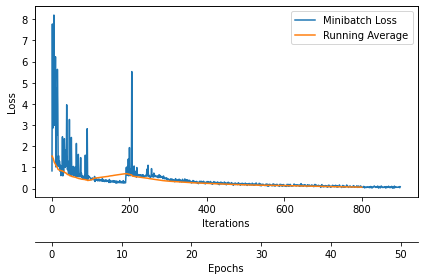

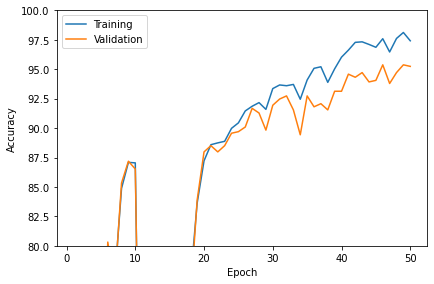

In [18]:
model = VGG16(num_classes = 2)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum = 0.9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    test_loader=test_loader,
    valid_loader = valid_loader,
    optimizer=optimizer,
    device=DEVICE,
    logging_interval=3)

In [19]:
torch.save(model.state_dict(), 'VGG16_model.pt')
torch.save(optimizer.state_dict(), 'VGG16_optimizer.pt')
torch.save(scheduler.state_dict(), 'VGG16_scheduler.pt')

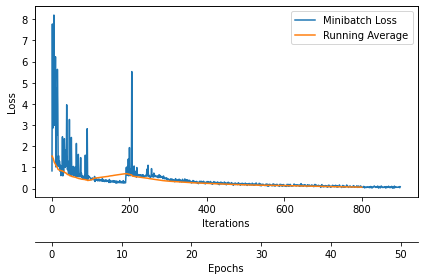

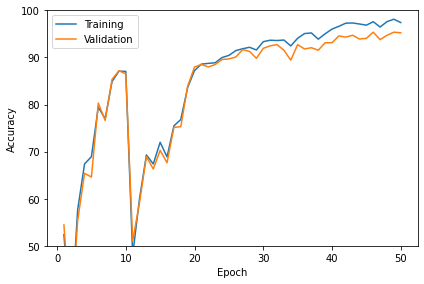

In [21]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=100)
plt.savefig('VGG16_training_loss.png')
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([50, 100])
plt.savefig('VGG16_accuracy.png')
plt.show()